In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

from vega_datasets import data


In [45]:
df_temps = data.sf_temps()
df_temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [46]:
df_temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<Axes: xlabel='date'>

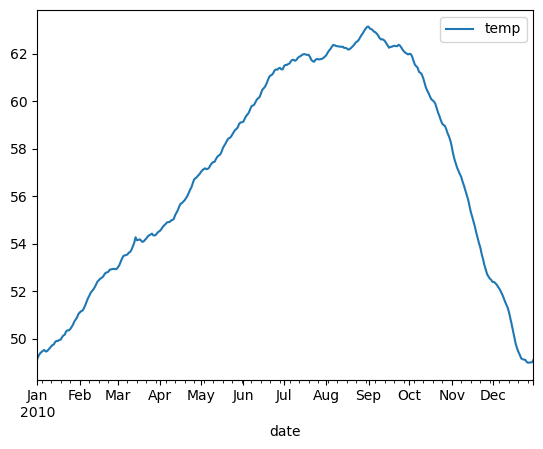

In [50]:
df_temps.resample('D', on='date').mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

<Axes: xlabel='day'>

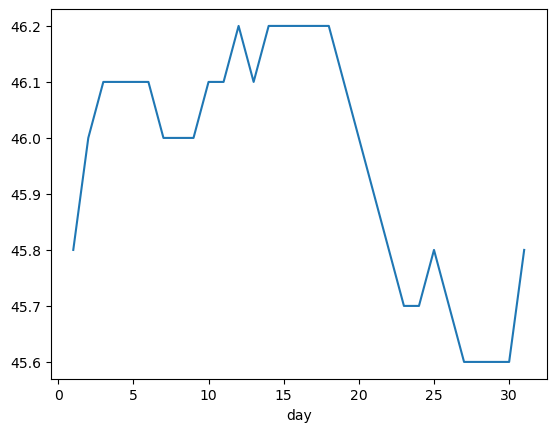

In [7]:
df_temps.groupby('day').min().temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.

<Axes: xlabel='day'>

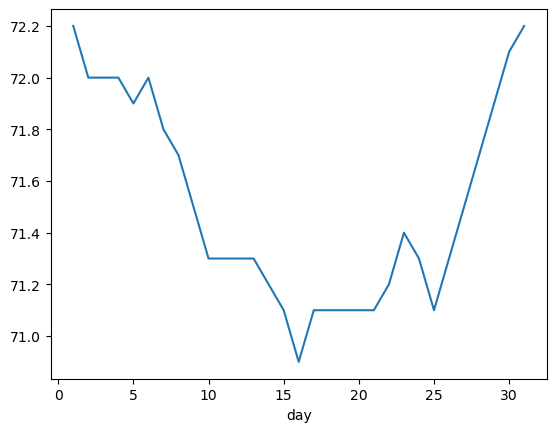

In [8]:
df_temps.groupby('day').max().temp.plot()

4. Which month is the coldest, on average?

In [9]:
df_temps['month'] = df_temps.date.dt.month

In [10]:
df_temps.groupby('month').mean().temp.sort_values()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/2063052165.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temps.groupby('month').mean().temp.sort_values()


month
1     49.984140
12    50.498253
2     52.243899
3     53.956528
11    55.185139
4     55.633056
5     57.970968
10    60.253091
6     60.444722
7     61.765457
8     62.405376
9     62.487083
Name: temp, dtype: float64

5. Which month has the highest average temperature?

In [11]:
df_temps.groupby('month').mean().temp.sort_values(ascending=False)

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/3123377654.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temps.groupby('month').mean().temp.sort_values(ascending=False)


month
9     62.487083
8     62.405376
7     61.765457
6     60.444722
10    60.253091
5     57.970968
4     55.633056
11    55.185139
3     53.956528
2     52.243899
12    50.498253
1     49.984140
Name: temp, dtype: float64

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [51]:
df_temps.resample('D', on='date').mean().agg(['min', 'max']).temp


min    48.991667
max    63.129167
Name: temp, dtype: float64

In [13]:
df_temps.head()

,temp,date,day,month
0,47.8,2010-01-01 00:00:00,1,1
1,47.4,2010-01-01 01:00:00,1,1
2,46.9,2010-01-01 02:00:00,1,1
3,46.5,2010-01-01 03:00:00,1,1
4,46.0,2010-01-01 04:00:00,1,1


use seattle weather dataset

In [14]:
df_seattle = data.seattle_weather()

In [15]:
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
df_seattle.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

1. Which year and month combination has the highest amount of precipitation?

In [25]:
df_seattle_group = df_seattle.groupby([(df_seattle.date.dt.year), (df_seattle.date.dt.month)]).sum().precipitation.sort_values(ascending=False)

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/2472164332.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seattle_group = df_seattle.groupby([(df_seattle.date.dt.year), (df_seattle.date.dt.month)]).sum().precipitation.sort_values(ascending=False)


In [26]:
df_seattle_group.head()

date  date
2015  12      284.5
2014  3       240.0
2015  11      212.6
2012  11      210.5
      3       183.0
Name: precipitation, dtype: float64

2. Visualize the amount of monthly precipitation over time.

In [27]:
df_seattle['month'] = df_seattle.date.dt.month

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/4145674053.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seattle.groupby('month').mean().precipitation.plot()


<Axes: xlabel='month'>

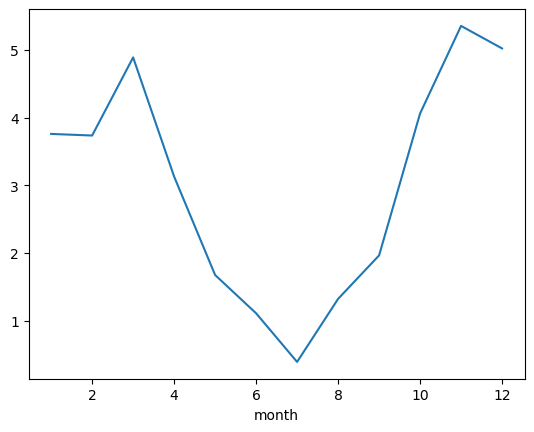

In [28]:
df_seattle.groupby('month').mean().precipitation.plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [29]:
df_seattle['dayofyear'] = df_seattle.date.dt.dayofyear

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/3373347143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seattle.groupby('dayofyear').mean().wind.plot()


<Axes: xlabel='dayofyear'>

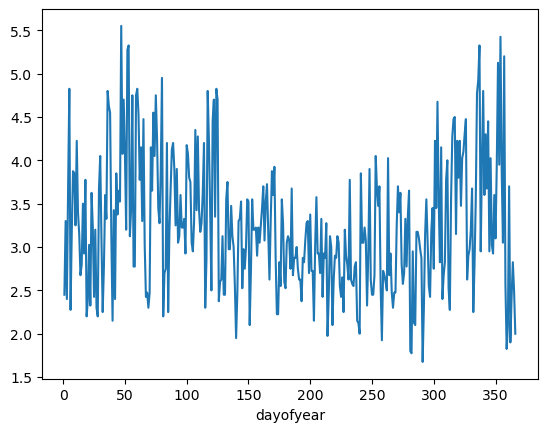

In [30]:
df_seattle.groupby('dayofyear').mean().wind.plot()

4. Which year-month combination is the windiest?

In [31]:
df_seattle_group = df_seattle.groupby([(df_seattle.date.dt.year), (df_seattle.date.dt.month)]).sum().wind.sort_values(ascending=False)

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/646718154.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seattle_group = df_seattle.groupby([(df_seattle.date.dt.year), (df_seattle.date.dt.month)]).sum().wind.sort_values(ascending=False)


In [32]:
df_seattle_group.head()

date  date
2015  12      134.6
2012  3       131.7
2014  2       126.8
2012  1       120.9
2014  11      119.5
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [33]:
df_seattle['year'] = df_seattle.date.dt.year

In [ ]:
df_seattle['']

6. In which month does it rain the most?

In [34]:
df_seattle.groupby('month').mean().precipitation.sort_values(ascending=False)

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_9242/2360226346.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seattle.groupby('month').mean().precipitation.sort_values(ascending=False)


month
11    5.354167
12    5.021774
3     4.888710
10    4.059677
1     3.758065
2     3.734513
4     3.128333
9     1.962500
5     1.673387
8     1.320161
6     1.107500
7     0.388710
Name: precipitation, dtype: float64

7. Which month has the most number of days with a non-zero amount of precipitation?

Use flight data

In [40]:
df_flights = data.flights_20k()


In [41]:
df_flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [42]:
df_flights.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

1. Convert any negative delays to 0.

In [52]:
df_flights[df_flights < pd.Timedelta(0)] = 0

TypeError: Invalid comparison between dtype=datetime64[ns] and Timedelta

In [37]:
df_flights = df_flights.delay[df_flights.delay < 0] = 0

AttributeError: 'int' object has no attribute 'delay'

2. Which hour of the day has the highest average delay?

3. Does the day of the week make a difference in the delay amount?

4. Does the month make a difference in the delay amount?